# A Feedforward Neural Network Implementation Using Pytorch

#### 1. Data Pre-processing 

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

path_fmnist_train = 'mnist_fashion/fashion-mnist_train.csv'
path_fmnist_test = 'mnist_fashion/fashion-mnist_test.csv'

class loadDataset(Dataset):
    
    def __init__(self,dataset_path):
        
        cvs_file = np.loadtxt(dataset_path, delimiter=',', dtype=np.float32, skiprows=1)
        
        self.len = cvs_file.shape[0]
        self.X = cvs_file[:,1:]/255
        self.Y = cvs_file[:,0].astype(np.int64)
        
    def __getitem__(self, index):
        return self.X[index], self.Y[index]
    
    def __len__(self):
        return self.len
        
import time

start = time.time()
print('loading dataloader')
trainDataloader = loadDataset(path_fmnist_train)
testDataloader = loadDataset(path_fmnist_test)
end = time.time()
print('Data loading took',(end-start),'seconds')

print('loading datasets')
fmnist_train = DataLoader(dataset=trainDataloader, batch_size=100, shuffle=True, num_workers=4)
fmnist_test = DataLoader(dataset=testDataloader, batch_size=100, shuffle=True, num_workers=4)

loading dataloader
Data loading took 79.51316976547241 seconds
loading datasets


#### 2. Building The Neural Network

In [2]:
import torch.nn as nn
import torch.nn.functional as nnf

class neuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.input_layer   = nn.Linear(28*28,64)
        self.hidden_layer1 = nn.Linear(64,64)
        self.hidden_layer2 = nn.Linear(64,64)
        self.output_layer  = nn.Linear(64,10)
        
    def forward(self, x):
        x = nnf.relu(self.input_layer(x))
        x = nnf.relu(self.hidden_layer1(x))
        x = nnf.relu(self.hidden_layer2(x))
        return nnf.log_softmax(self.output_layer(x),dim=1)
    
fmnist_classifier = neuralNetwork()

#### 3. Training The Neural Network

In [3]:
import torch.optim as train

optimizer = train.Adam(fmnist_classifier.parameters(), lr=0.001)

start = time.time()

epoch = 3

for i in range(epoch):
    for data in fmnist_train:
        X, Y = data
        output = fmnist_classifier(X)
        loss = nnf.nll_loss(output,Y)
        loss.backward()
        optimizer.step()
        fmnist_classifier.zero_grad()
    print(loss)
    
end = time.time()

print('Training took',(end-start),'seconds')


tensor(0.3953, grad_fn=<NllLossBackward>)
tensor(0.3154, grad_fn=<NllLossBackward>)
tensor(0.4694, grad_fn=<NllLossBackward>)
Training took 34.6606867313385 seconds


#### 4. Cross-validation 

In [4]:
correct = 0
total = 0

with torch.no_grad():
    for data in fmnist_train:
        X, y = data
        output = fmnist_classifier(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Train dataset Accuracy: ", round(correct/total, 3))

correct = 0
total = 0

with torch.no_grad():
    for data in fmnist_test:
        X, y = data
        output = fmnist_classifier(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Train dataset Accuracy: ", round(correct/total, 3))

Train dataset Accuracy:  0.876
Train dataset Accuracy:  0.867


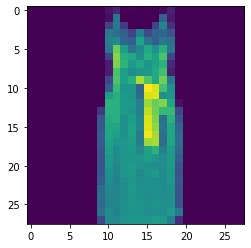

predicted output =  Dress
target output    =  Dress


In [5]:
index = 7

labelsmap = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

import matplotlib.pyplot as plt
plt.imshow(X[index].view(28,28))
plt.show()

print('predicted output = ',labelsmap[torch.argmax(fmnist_classifier(X[index].view(1,784))[0]).item()])
print('target output    = ',labelsmap[y[index].item()])